In [12]:
%load_ext sql
import pandas as pd
import numpy as np
import matplotlib as plt 
import seaborn as sns

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [6]:
%sql sqlite:///phonesData.db

In [4]:
%%sql 
CREATE TABLE if not exists phones(
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    ProductName VARCHAR(30) NOT NULL,
    Manufacturer VARCHAR(30) NOT NULL,
    ProductCount INT NOT NULL,
    Price INT NOT NULL
)

 * sqlite:///phonesData.db
Done.


[]

In [4]:
%%sql

INSERT INTO phones (ProductName, Manufacturer, ProductCount, Price)
VALUES ('iPhone X', 'Apple', 3, 76000),
    ('iPhone 8', 'Apple', 2, 51000),
    ('Galaxy S9', 'Samsung', 2, 56000),
    ('Galaxy S8', 'Samsung', 1, 41000),
    ('P20 Pro', 'Huawei', 5, 36000)

 * sqlite:///phonesData.db
5 rows affected.


[]

In [5]:
%sql select * from phones


 * sqlite:///phonesData.db
Done.


id,ProductName,Manufacturer,ProductCount,Price
1,iPhone X,Apple,3,76000
2,iPhone 8,Apple,2,51000
3,Galaxy S9,Samsung,2,56000
4,Galaxy S8,Samsung,1,41000
5,P20 Pro,Huawei,5,36000


In [9]:
result = %sql SELECT * FROM phones
result

 * sqlite:///phonesData.db
Done.


id,ProductName,Manufacturer,ProductCount,Price
1,iPhone X,Apple,3,76000
2,iPhone 8,Apple,2,51000
3,Galaxy S9,Samsung,2,56000
4,Galaxy S8,Samsung,1,41000
5,P20 Pro,Huawei,5,36000


In [21]:
df = pd.DataFrame(result)
headers = ['id','ProductName','Manufacturer','ProductCount','Price']
df.columns=headers
df.head(8)

,id,ProductName,Manufacturer,ProductCount,Price
0,1,iPhone X,Apple,3,76000
1,2,iPhone 8,Apple,2,51000
2,3,Galaxy S9,Samsung,2,56000
3,4,Galaxy S8,Samsung,1,41000
4,5,P20 Pro,Huawei,5,36000


<Axes: xlabel='Manufacturer', ylabel='Price'>

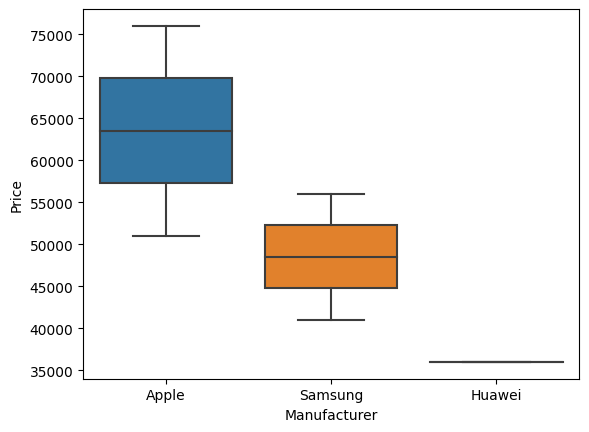

In [19]:
sns.boxplot(x='Manufacturer', y='Price', data=df)

In [6]:
%%sql 
SELECT ProductName, Manufacturer, Price 
FROM phones 
WHERE ProductCount > 2

 * sqlite:///phonesData.db
Done.


ProductName,Manufacturer,Price
iPhone X,Apple,76000
P20 Pro,Huawei,36000


In [7]:
%%sql 
SELECT ProductName, Price, ProductCount 
FROM phones 
WHERE Manufacturer = 'Samsung'

 * sqlite:///phonesData.db
Done.


ProductName,Price,ProductCount
Galaxy S9,56000,2
Galaxy S8,41000,1


In [8]:
%%sql 
SELECT * FROM phones 
WHERE ProductName LIKE '%Iphone%'

 * sqlite:///phonesData.db
Done.


id,ProductName,Manufacturer,ProductCount,Price
1,iPhone X,Apple,3,76000
2,iPhone 8,Apple,2,51000


In [9]:
%%sql 
SELECT * FROM phones 
WHERE Manufacturer LIKE '%Samsung%'

 * sqlite:///phonesData.db
Done.


id,ProductName,Manufacturer,ProductCount,Price
3,Galaxy S9,Samsung,2,56000
4,Galaxy S8,Samsung,1,41000


In [10]:
%%sql 
SELECT * FROM phones 
WHERE ProductName REGEXP '[0-9]'

 * sqlite:///phonesData.db
Done.


id,ProductName,Manufacturer,ProductCount,Price
2,iPhone 8,Apple,2,51000
3,Galaxy S9,Samsung,2,56000
4,Galaxy S8,Samsung,1,41000
5,P20 Pro,Huawei,5,36000


In [11]:
%%sql 
SELECT * FROM phones 
WHERE ProductName LIKE '%8%'

 * sqlite:///phonesData.db
Done.


id,ProductName,Manufacturer,ProductCount,Price
2,iPhone 8,Apple,2,51000
4,Galaxy S8,Samsung,1,41000
